# 2 Применение решающего дерева

In [38]:
import pydotplus 
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.cross_validation import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score
import pandas 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
german = pandas.read_csv('german.data-numeric', header=None, delim_whitespace=True)

X_data = german[list(set(german.columns) - set([24]))]
y_data = german[24]

In [26]:
def build_tree(X_data, y_data, depth=None):
    model = tree.DecisionTreeClassifier(max_depth=depth)
    model.fit(X_data, y_data)
    dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                             filled=True, rounded=True,  
                             special_characters=True)
    graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
    image = Image(graph.create_png())
    return image

Построим решающее дерево на датасете german credit data:

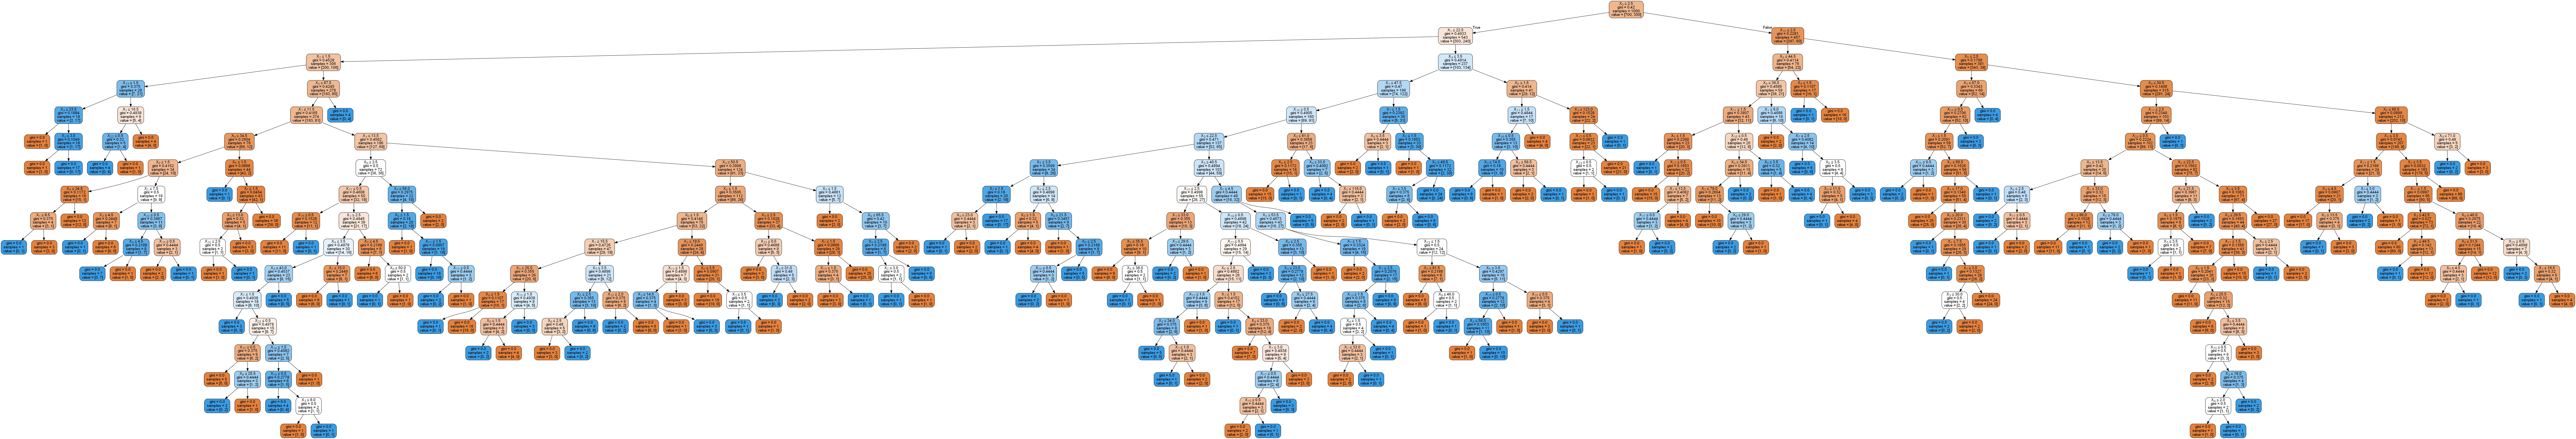

In [28]:
build_tree(X_data, y_data)

Ограничим высоту: 

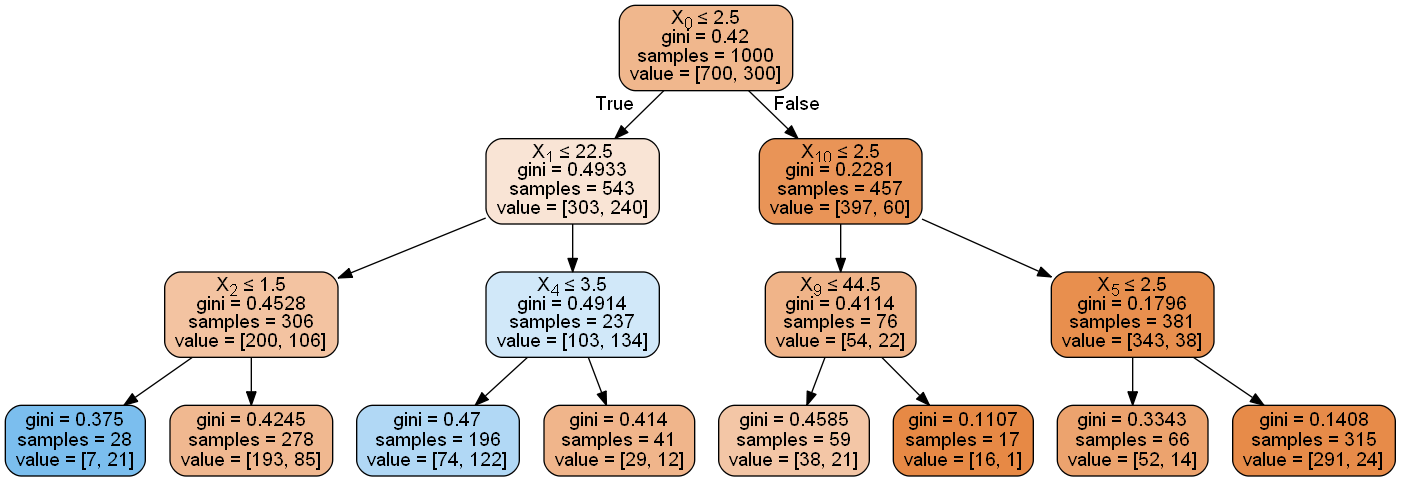

In [30]:
build_tree(X_data, y_data, 3)

Построим графики зависимости качества на кросс валидации и на обучающей выборке от глубины дерева. 

In [49]:
cross_val = []
train = []
x = np.arange(2,25)
for depth in x:
    model = tree.DecisionTreeClassifier(max_depth=depth)
    model.fit(X_data, y_data)
    cross_val.append(cross_val_score(model, X_data, y_data, scoring='accuracy').mean())
    train.append(accuracy_score(y_data, model.predict(X_data)))

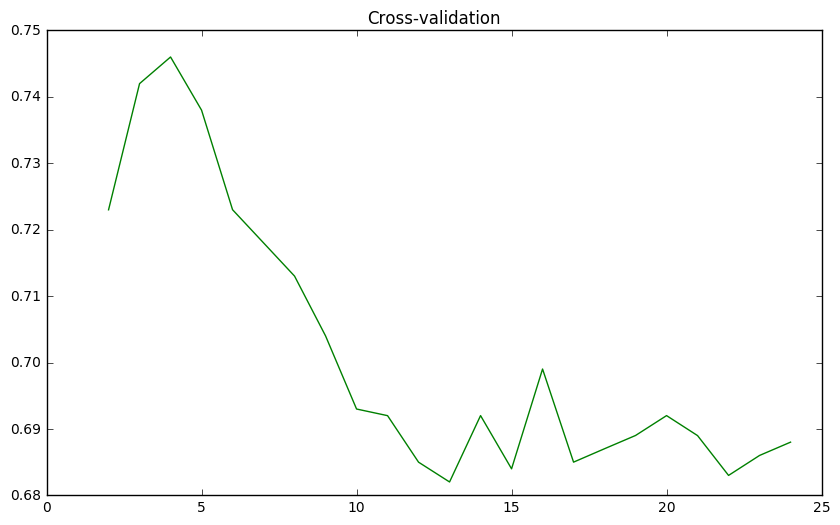

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(x, cross_val, color='green')
plt.title("Cross-validation")
plt.show()

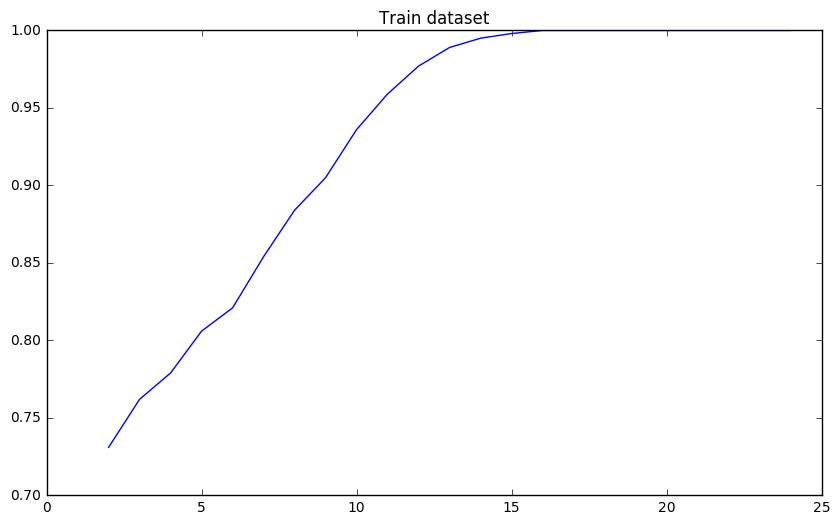

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(x, train, color='blue')
plt.title("Train dataset")
plt.show()

Как видно из графиков, при увеличинии максимальной глубины деревья склонны к переобучению. 